# 1. Financial EDA - Kiet Nguyen

### Steps

Code to pull data is as below, we used a mixed of **yfinace** data and **fred** data. 7 indicators

Each dataset has a different update schedule, for example, **sp500** is updated daily, while **gdp growth rate** is updated quarterly. *Here is the list:*
- sp500: daily 
- interest_rates: daily 
- inflation_rates: monthly 
- gdp_growth_rates: quarterly 
- employment_rates: monthly 
- consumer_sentiment: monthly 
- vix: daily

*Cleaning steps:*
- Rename each indicator's column name
- Fill na values with **ffill** method
- For quarterly and monthly indicators, the data change will not be abrupt. For example, data in Jan 1 will not be significantly different from Jan 15. Therefore, in order to expand the time series data, we will fill rows, for example, Jan 2 to Jan 31, with data on Jan 1. This is filled by using **ffill** method.
- We merge data using **interest_rates** df as base df, since it has the most rows.
- Finally, fill na with **ffill** and **bfill** using the same logic. Or else, just drop it

### Code to pull financial data

In [ ]:
# DO NOT RUN
import yfinance as yf
import pandas_datareader.data as web
import datetime

sp500_data = yf.download("SPY", start="1999-01-01", end="2024-08-19")
vix_data = yf.download("^VIX", start="1999-01-01", end="2024-08-19")

# Define date range
start_date = datetime.datetime(1999, 1, 1)
end_date = datetime.datetime(2024, 8, 19)

# Interest Rates (10-Year Treasury)
interest_rates = web.DataReader('DGS10', 'fred', start_date, end_date)

# Inflation Rates (CPI)
inflation_rates = web.DataReader('CPIAUCSL', 'fred', start_date, end_date)

# GDP Growth Rates
gdp_growth_rates = web.DataReader('A191RL1Q225SBEA', 'fred', start_date, end_date)

# Employment Data (Unemployment Rate)
employment_data = web.DataReader('UNRATE', 'fred', start_date, end_date)

# Consumer Sentiment Index
consumer_sentiment = web.DataReader('UMCSENT', 'fred', start_date, end_date)

# Save data to CSV
sp500_data.to_csv("sp500_data.csv")
interest_rates.to_csv("interest_rates.csv")
inflation_rates.to_csv("inflation_rates.csv")
gdp_growth_rates.to_csv("gdp_growth_rates.csv")
employment_data.to_csv("employment_data.csv")
consumer_sentiment.to_csv("consumer_sentiment.csv")
vix_data.to_csv("vix_data.csv")

## 1.1 Data Preprocessing

In [1]:
# Import necessary library
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import seaborn as sns
warnings.filterwarnings("ignore", category=FutureWarning)


In [2]:
# Create DataFrame
sp500 = pd.read_csv('sp500_data.csv')
interest_rates = pd.read_csv('interest_rates.csv')
inflation_rates = pd.read_csv('inflation_rates.csv')
gdp_growth_rates = pd.read_csv('gdp_growth_rates.csv')
employment_rates = pd.read_csv('employment_data.csv')
consumer_sentiment = pd.read_csv('consumer_sentiment.csv')
vix = pd.read_csv('vix_data.csv')

### 1.1.1 Understanding the datasets:

- **sp500**: contains historical data on the S&P 500 index, which tracks the performance of 500 of the largest publicly traded companies in the U.S. stock market. It includes fields such as date, opening price, closing price, daily highs and lows, and trading volume.

- **interest_rates (DGS10)**: Represents the 10-Year Treasury Constant Maturity Rate, a crucial indicator of long-term interest rates and market sentiment on future economic conditions.

- **inflation_rates (CPIAUCSL):** tracks the Consumer Price Index for All Urban Consumers, representing the overall change in prices of goods and services in urban areas, providing a measure of inflation.

- **gdp_growth_rates (A191RL1Q225SBEA)**: represents the quarterly percentage change in Real GDP, adjusted for inflation and seasonality, which tracks the overall growth or contraction of the U.S. economy.

- **employment_rates (UNRATE)**: tracks the U.S. unemployment rate, measuring the percentage of the labor force that is jobless and actively seeking work, providing insight into the health of the labor market.

- **consumer_sentiment (UMCSENT)**: tracks consumer confidence and optimism about economic conditions, providing insight into future consumer spending and economic behavior. High consumer sentiment often correlates with higher spending, while low sentiment may indicate economic pessimism.

- **vix**: Known as the "fear gauge," it tracks the Volatility Index (VIX), which measures market expectations of volatility over the next 30 days. Higher VIX values indicate increased uncertainty or market fear, while lower values suggest stability.

### 1.1.2 Renaming columns

In [3]:
# Interest Rates is a daily-updated indicator
interest_rates = interest_rates.rename(columns = {'DATE' : 'Date','DGS10':'Interest Rate'})
# Smoothing the first data point, since it is null
interest_rates.loc[0, 'Interest Rate'] = interest_rates.loc[1, 'Interest Rate']

In [4]:
# sp500 price is updated daily
sp500.columns = ['Date']+['sp500_' + str(col) for col in sp500.columns if col != 'Date']
sp500.describe

<bound method NDFrame.describe of             Date  sp500_Open  sp500_High   sp500_Low  sp500_Close  \
0     1999-01-04  123.375000  125.218750  121.718750   123.031250   
1     1999-01-05  122.937500  124.875000  122.937500   124.437500   
2     1999-01-06  125.812500  127.750000  125.750000   127.437500   
3     1999-01-07  126.375000  127.218750  125.781250   126.812500   
4     1999-01-08  128.187500  128.500000  125.968750   127.750000   
...          ...         ...         ...         ...          ...   
6442  2024-08-12  534.210022  535.729980  530.950012   533.270020   
6443  2024-08-13  536.530029  542.280029  536.280029   542.039978   
6444  2024-08-14  542.849976  544.960022  540.119995   543.750000   
6445  2024-08-15  549.500000  553.359985  548.880005   553.070007   
6446  2024-08-16  551.419983  555.020020  551.260010   554.309998   

      sp500_Adj Close  sp500_Volume  
0           78.077797       9450400  
1           78.970261       8031000  
2           80.874115  

In [5]:
# Infation Rate is updated monthly
inflation_rates = inflation_rates.rename(columns = {'DATE' : 'Date','CPIAUCSL':'Inflation Index'})
inflation_rates

,Date,Inflation Index
0,1999-01-01,164.700
1,1999-02-01,164.700
2,1999-03-01,164.800
3,1999-04-01,165.900
4,1999-05-01,166.000
...,...,...
303,2024-04-01,313.207
304,2024-05-01,313.225
305,2024-06-01,313.049
306,2024-07-01,313.534


In [6]:
# GDP growth rate is updated quarterly
gdp_growth_rates = gdp_growth_rates.rename(columns = {'DATE' : 'Date','A191RL1Q225SBEA':'GDP Growth Rate'})
gdp_growth_rates

,Date,GDP Growth Rate
0,1999-01-01,3.8
1,1999-04-01,3.4
2,1999-07-01,5.4
3,1999-10-01,6.7
4,2000-01-01,1.5
...,...,...
97,2023-04-01,2.1
98,2023-07-01,4.9
99,2023-10-01,3.4
100,2024-01-01,1.4


In [7]:
# Employment Rate is updated Monthly
employment_rates = employment_rates.rename(columns = {'DATE' : 'Date','UNRATE':'Unemployment Rate'})
employment_rates

,Date,Unemployment Rate
0,1999-01-01,4.3
1,1999-02-01,4.4
2,1999-03-01,4.2
3,1999-04-01,4.3
4,1999-05-01,4.2
...,...,...
303,2024-04-01,3.9
304,2024-05-01,4.0
305,2024-06-01,4.1
306,2024-07-01,4.3


In [8]:
# Consumer Sentiment is updated monthly
consumer_sentiment = consumer_sentiment.rename(columns = {'DATE' : 'Date','UMCSENT':'Consumer Sentiment'})
consumer_sentiment

,Date,Consumer Sentiment
0,1999-01-01,103.9
1,1999-02-01,108.1
2,1999-03-01,105.7
3,1999-04-01,104.6
4,1999-05-01,106.8
...,...,...
302,2024-03-01,79.4
303,2024-04-01,77.2
304,2024-05-01,69.1
305,2024-06-01,68.2


In [9]:
# Volatility Index is calculated daily
vix.columns = ['Date']+['VIX ' + str(col) for col in vix.columns if col != 'Date']
vix

,Date,VIX Open,VIX High,VIX Low,VIX Close,VIX Adj Close,VIX Volume
0,1999-01-04,25.379999,26.959999,24.740000,26.170000,26.170000,0
1,1999-01-05,25.920000,25.980000,24.360001,24.459999,24.459999,0
2,1999-01-06,23.360001,23.379999,22.680000,23.340000,23.340000,0
3,1999-01-07,24.420000,24.900000,24.040001,24.370001,24.370001,0
4,1999-01-08,22.950001,24.080000,22.809999,23.280001,23.280001,0
...,...,...,...,...,...,...,...
6442,2024-08-12,20.790001,21.190001,18.889999,20.709999,20.709999,0
6443,2024-08-13,20.059999,20.790001,17.950001,18.120001,18.120001,0
6444,2024-08-14,18.410000,18.490000,16.120001,16.190001,16.190001,0
6445,2024-08-15,16.270000,16.680000,14.770000,15.230000,15.230000,0


### 1.1.3 Handling Null Records

In [10]:
# Define a function to handle date column
def time_series_data_handler(df):
    # Convert 'Date' column to datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Set 'Date' as the index
    df.set_index('Date', inplace=True) 

    # Resample to daily frequency and forward fill missing data
    return df.resample('D').ffill()

#### Interest Rates

In [11]:
interest_rates.isna().sum()

Date               0
Interest Rate    273
dtype: int64

In [12]:
# Fill na with previous date data
interest_rates.fillna(method='ffill', inplace=True)

# Check if there are any remaining NaN values
interest_rates.isna().sum()

Date             0
Interest Rate    0
dtype: int64

In [13]:
interest_rates_graph = interest_rates

In [14]:
interest_rates = time_series_data_handler(interest_rates)
interest_rates.shape

(9363, 1)

#### SP500

In [15]:
sp500.isna().sum()
sp500_graph = sp500

In [16]:
sp500 = time_series_data_handler(sp500)
sp500.shape

(9357, 6)

#### Inflation Rates

In [17]:
inflation_rates.isna().sum()
inflation_rates_graph = inflation_rates

In [18]:
inflation_rates = time_series_data_handler(inflation_rates)
inflation_rates.shape

(9345, 1)

#### GDP Growth Rates

In [19]:
gdp_growth_rates.isna().sum()
gdp_growth_rates_graph = gdp_growth_rates

In [20]:
gdp_growth_rates = time_series_data_handler(gdp_growth_rates)
gdp_growth_rates.shape

(9223, 1)

#### Employment Rates

In [22]:
employment_rates.isna().sum()
employment_rates_graph = employment_rates

In [23]:
employment_rates = time_series_data_handler(employment_rates)
employment_rates.shape

(9345, 1)

#### Consumer Sentiment

In [24]:
consumer_sentiment.isna().sum()
consumer_sentiment_graph = consumer_sentiment

In [25]:
consumer_sentiment = time_series_data_handler(consumer_sentiment)
consumer_sentiment.shape

(9314, 1)

#### Volatility Index (VIX)

In [26]:
vix.columns.isna().sum()
vix_graph = vix

In [27]:
vix = time_series_data_handler(vix)
vix.shape

(9357, 6)

## 1.2 Merge df for analysis and ML model

In [28]:
df = interest_rates.merge(gdp_growth_rates, on = 'Date', how = 'left')
df = df.merge(sp500, on = 'Date', how = 'left')
df = df.merge(inflation_rates, on = 'Date', how = 'left')
df = df.merge(employment_rates, on = 'Date', how = 'left')
df = df.merge(consumer_sentiment, on = 'Date', how = 'left')
df = df.merge(vix, on = 'Date', how = 'left')

# Final df, should have 17 columns
df.describe

<bound method NDFrame.describe of             Interest Rate  GDP Growth Rate  sp500_Open  sp500_High  \
Date                                                                 
1999-01-01           4.69              3.8         NaN         NaN   
1999-01-02           4.69              3.8         NaN         NaN   
1999-01-03           4.69              3.8         NaN         NaN   
1999-01-04           4.69              3.8  123.375000  125.218750   
1999-01-05           4.74              3.8  122.937500  124.875000   
...                   ...              ...         ...         ...   
2024-08-15           3.92              NaN  549.500000  553.359985   
2024-08-16           3.89              NaN  551.419983  555.020020   
2024-08-17           3.89              NaN         NaN         NaN   
2024-08-18           3.89              NaN         NaN         NaN   
2024-08-19           3.86              NaN         NaN         NaN   

             sp500_Low  sp500_Close  sp500_Adj Close  s

In [29]:
# Return data from 1999-01-04 to 2024-04-01
# df = df.dropna()

# Do ffill and bfill to retain data from 1999-01-01 to 2024-08-19
df = df.fillna(method = 'ffill')
df = df.fillna(method = 'bfill')
print("Null values: ")
print(df.isna().sum())
df.shape

Null values: 
Interest Rate         0
GDP Growth Rate       0
sp500_Open            0
sp500_High            0
sp500_Low             0
sp500_Close           0
sp500_Adj Close       0
sp500_Volume          0
Inflation Index       0
Unemployment Rate     0
Consumer Sentiment    0
VIX Open              0
VIX High              0
VIX Low               0
VIX Close             0
VIX Adj Close         0
VIX Volume            0
dtype: int64


(9363, 17)

## 1.3 EDA

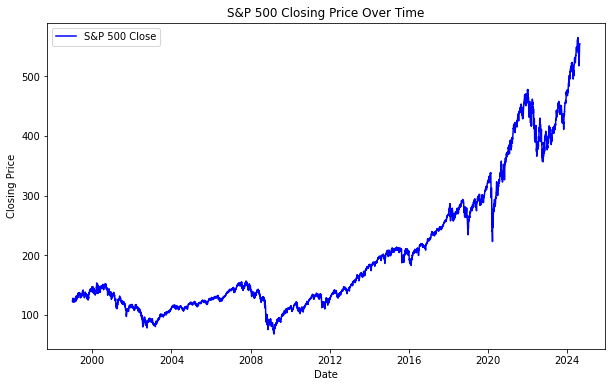

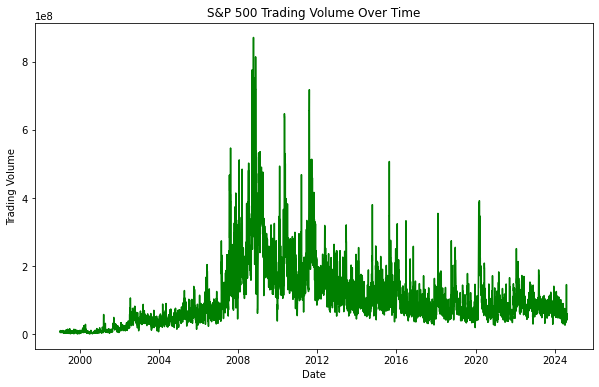

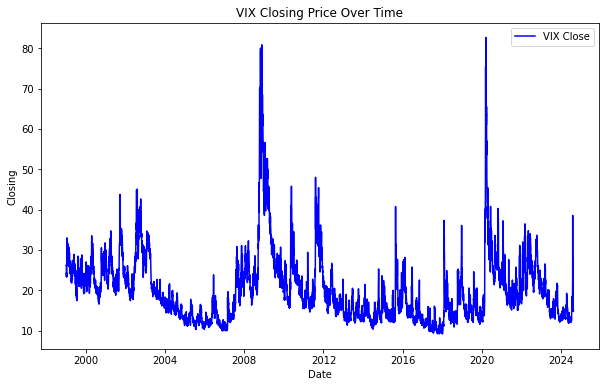

In [42]:
# Line chart for Closing Price
plt.figure(figsize=(10,6))
plt.plot(df.index, df['sp500_Close'], label='S&P 500 Close', color='b')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('S&P 500 Closing Price Over Time')
plt.legend()
plt.show()

# Volume Bar Chart
plt.figure(figsize=(10,6))
plt.plot(df.index, df['sp500_Volume'], color='g')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.title('S&P 500 Trading Volume Over Time')
plt.show()

# Line chart for Votality
plt.figure(figsize=(10,6))
plt.plot(df.index, df['VIX Close'], label='VIX Close', color='b')
plt.xlabel('Date')
plt.ylabel('Closing')
plt.title('VIX Closing Over Time')
plt.legend()
plt.show()

In the "S&P 500 Closing Price" graph, we can see that the price almost gradually increases over year, execept in some periods. In the 2008, the closing price goes down for almost 50% indicating the demand for this stocks got lower. Or in the beginning 2020, we can observe the same trend, even though not as dramatic. If comparing this with the "VIX Closing Over Time" graph, the VIX is quite high in these periods, indicating how unsure of investor against the market.
If we have a look at the "S&P 500 Trading Volume" graph, it is quite interesting that at intervals where S&P 500 closing price dips, the trading fluctuate a lot

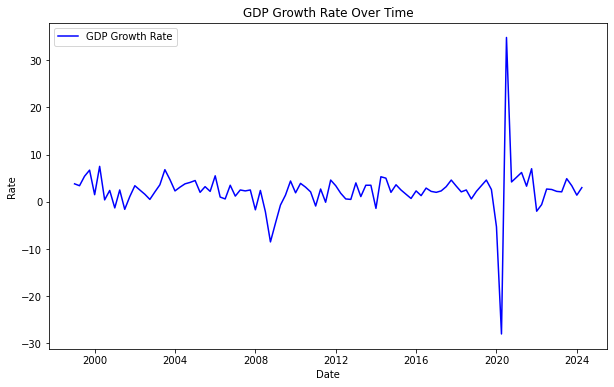

In [34]:
# Line chart for GDP Growth Rate
plt.figure(figsize=(10,6))
plt.plot(gdp_growth_rates_graph.index, gdp_growth_rates_graph['GDP Growth Rate'], label='GDP Growth Rate', color='b')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.title('GDP Growth Rate Over Time')
plt.legend()
plt.show()

In the "GDP Growth Rate Over Time" graph, first thing we can see is the GDP growth rate dip very low in 2020 then bounce up in 2021. This is the COVID period, and the recovery pattern seems to happen really fast. This is exaplained as the drop in Omicron case, and businesses start to operate after the lock down. Comparing to the recover pattern of 2008, which takes more than 2 years to come back to normal, the 2021 recovery was definitely rapid.
However,it seems like the rate is not quite reflective of what the US Commerce Department announce, so we will need to look into the number.

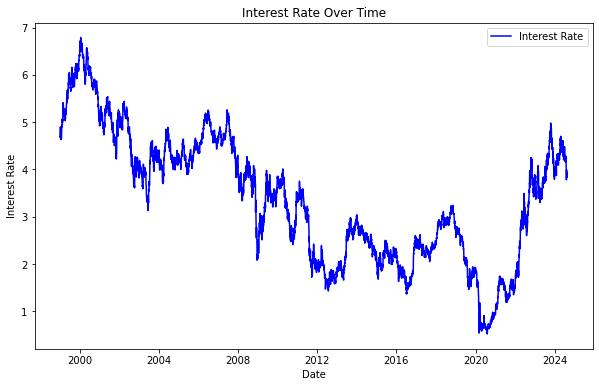

In [35]:
# Line chart for Interest Rate
plt.figure(figsize=(10,6))
plt.plot(interest_rates_graph.index, interest_rates_graph['Interest Rate'], label='Interest Rate', color='b')
plt.xlabel('Date')
plt.ylabel('Interest Rate')
plt.title('Interest Rate Over Time')
plt.legend()
plt.show()

It seems like lowering the interest rate to promote the economy was practiced quite often in 2008 period and COVID period.

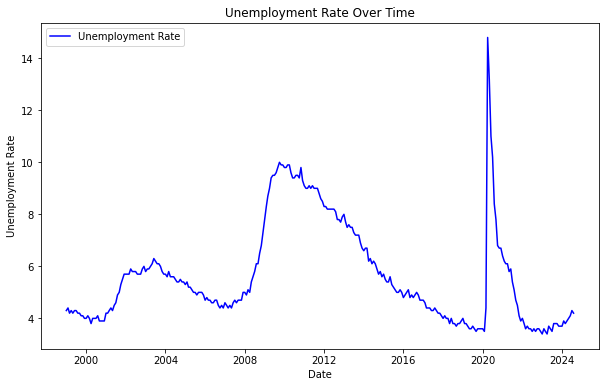

In [38]:
# Line chart for Unemployment Rate
plt.figure(figsize=(10,6))
plt.plot(employment_rates_graph.index, employment_rates_graph['Unemployment Rate'], label='Unemployment Rate', color='b')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Rate Over Time')
plt.legend()
plt.show()

The unemployemnt rate was generally maintained under 6%, while we can see during the 2008 depression, it peaks over 10%, and in the COVID period, over 14%. This data seems quite reflective on the economy.

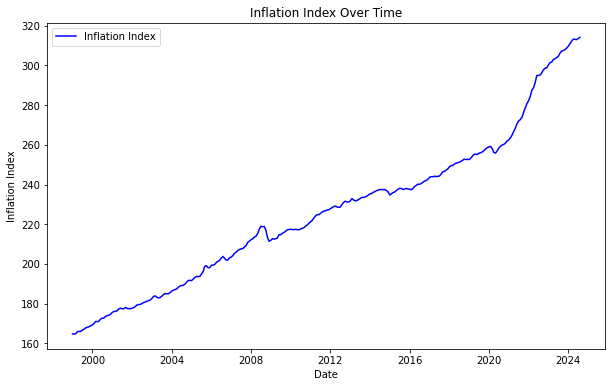

In [39]:
# Line chart for Inflation Index
plt.figure(figsize=(10,6))
plt.plot(inflation_rates_graph.index, inflation_rates_graph['Inflation Index'], label='Inflation Index', color='b')
plt.xlabel('Date')
plt.ylabel('Inflation Index')
plt.title('Inflation Index Over Time')
plt.legend()
plt.show()

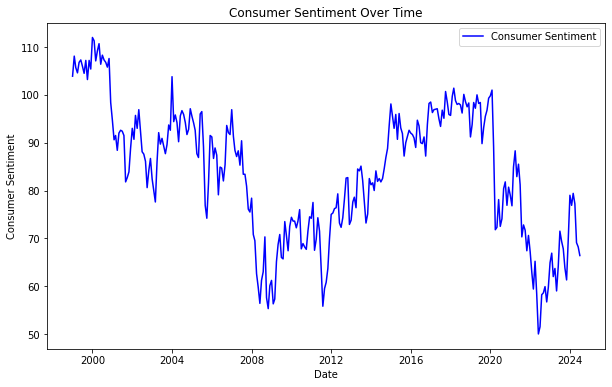

In [40]:
# Line chart for Consumer Sentiment
plt.figure(figsize=(10,6))
plt.plot(consumer_sentiment_graph.index, consumer_sentiment_graph['Consumer Sentiment'], label='Consumer Sentiment', color='b')
plt.xlabel('Date')
plt.ylabel('Consumer Sentiment')
plt.title('Consumer Sentiment Over Time')
plt.legend()
plt.show()

It is interesting to see that the consumer sentiment is highest in the 2000s. After the 2008 depression, it seems like consumer had much less consuming activities for several years. Same pattern during the COVID, which is understandable as unemployment rate in these periods was relatively high.